## Development of Algorithm for Removing Duplicate Points within a specified tolerence in 3D

After validating the 2D algoritham I improved it to 3D.
Here the same logic is applied in 3 dimesions.

## Possible critical test cases considered for which a simpler algorithm would have failed
1. Consider a case where input points are nothinig but a single line with distance any two consecutive points is less than the tolerence. If I am deleteing the first point instead of second point every time, I will end up with only the exteme last point. Which is not a feasible solution.
So I am removing the second point while keeping the first point and comparing the rest points with the same first point again.

## Problem analysis
I think the given problem can have multiple solutions depending upon where we start from the first point and if the tolerence is not very small. In case of a quadrilateral with side equal to tolerence, it may give two different dialgonal points depending upon where we start with.

## Code analysis and testing
I have tested the code by increaing and reducing
1. Tolerence
2. Number of Input points
3. Bounding box of the input points

## Inference
The time for the algorithm varies depending upon the number of input points and also the value of tolerence.

## Possible improvement and application
1. I think the time can further be improved by using range tree in data structures.
2. We can use this algorithm as an application to mesh cleanup in any FEA or CAD package. Instead of removing the duplicate point we can insert the mid-point of those two duplicate points and remove both of them. This is only useful if the tolerence is very small compared to point cloud or object dimensions.




In [1]:
# File creation
# Last updated by Onkar Salunkhe on 25 Oct 2020

import random

# Function for creating a random Point with Float values
def random_floats(min, max, size):
   # min = Minimum value of co-ordinate
   # max = Maximum value of co-ordinate
   # size = 2 for 2D point and 3 for 3D point
   return [random.uniform(min, max) for _ in range(size)]

# Create a file
Data= open("Random_Points_3D.txt","w+")

K = 1000 # Number of Input Points

# Writing the Points in the file 
with open('Random_Points_3D.txt', 'w+') as filehandle:
    for i in range(K):
        Point = random_floats(0, 1, 3)
        #filehandle.writelines("%s" % x for x in Point)
        filehandle.writelines(" ".join(str(x) for x in Point))
        filehandle.writelines("\n")

# Close file      
Data.close  


<function TextIOWrapper.close()>

In [2]:
# Opening an existing file with point cloud
Data=open("Random_Points_3D.txt","r")
# Reading each point
Point=Data.readlines()
# Writing each point in the list
lst3D = []
for i in Point:
    #print(i)
    m1=i.split()
    arr=[]
    for j in range(3):
        arr.append(float(m1[j]))
    lst3D.append(arr)
# Total number of Points in the file
print(len(lst3D))

1000


In [11]:
# Functions which can also be included in the header file

# Function to calculate distance between two points in 2D
def distance2D(Point1,Point2):
  # Point1 = List of co-ordinates of fisrt point in 2D
  # Point2 = List of co-ordinates of second point in 2D
  # return the distance between the points using distance formula
  return abs(math.sqrt((Point1[0]-Point2[0])**2+(Point1[1]-Point2[1])**2))

# Function to calculate distance between two points in 3D
def distance3D(Point1,Point2):
  # Point1 = List of co-ordinates of fisrt point in 3D
  # Point2 = List of co-ordinates of second point in 3D
  # return the distance between the points using distance formula
  return abs(math.sqrt((Point1[0]-Point2[0])**2+(Point1[1]-Point2[1])**2+(Point1[2]-Point2[2])**2))

# Function to calculate distance along x-axis
def distance_x(Point1,Point2):
  # Point1 = List of co-ordinates of fisrt point in 2D or 3D
  # Point2 = List of co-ordinates of second point in 2D or 3D
  # return the value of absolute difference in x-co-ordinates
  return abs(Point1[0]-Point2[0])

# Function to calculate distance along y-axis
def distance_y(Point1,Point2):
  # Point1 = List of co-ordinates of fisrt point in 2D or 3D
  # Point2 = List of co-ordinates of second point in 2D or 3D
  # return the value of absolute difference in y-co-ordinates
  return abs(Point1[1]-Point2[1])

# Function to calculate distance along z-axis
def distance_z(Point1,Point2):
  # Point1 = List of co-ordinates of fisrt point in 2D or 3D
  # Point2 = List of co-ordinates of second point in 2D or 3D
  # return the value of absolute difference in z-co-ordinates
  return abs(Point1[2]-Point2[2])

1000
195
0.05458807945251465


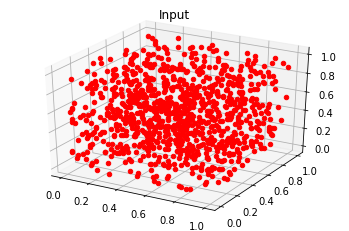

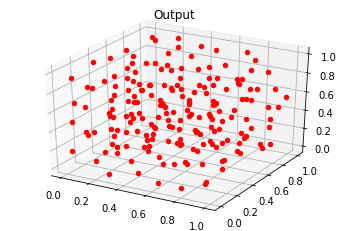

In [12]:
# Algorithm for removing the points within tolerence

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import itertools
import random
import time
import math

# Start the timer
start=time.time()

# Sort the list with x-co-ordinates
updated_list_3D = sorted(lst3D)
# Number of points in the Point cloud
print(len(updated_list_3D))

# Tolerence under which the points to be removed
tol=0.000001

# Algorithm 
i=0 # Start with the first element in the updated list as the base point

while i<len(updated_list_3D)-1:
  Count=0
  # Creating a slab of x-tolerance and count the number of points in that slab for x-tolerence
  while Count<len(updated_list_3D)-i and distance_x(updated_list_3D[i],updated_list_3D[i+Count])<tol:
    Count+=1
  # Save the starting point of the x-slab as base point of the slab
  x=i
  
  # Maximum range of points in the x-slab of x-tolerence
  n=i+Count+1  

  # Traverse upto ponits in the x-slab
  while x<n:
      # Traverse through the slab
      j=x+1
      # Traverse upto the range of x-slab
      while j<n-1: 
        # Check whether the y-co-ordinate is within tolerence or not
        if distance_y(updated_list_3D[x],updated_list_3D[j])<tol:
            # Check the actual distance between the points
            dist=distance3D(updated_list_3D[x],updated_list_3D[j])
            # Remove the points under tolerence else check for the next point
            if dist<tol:
                updated_list_3D.pop(j)
                j-=1 
                n-=1 # Upadating the range of the x-slab
        j+=1
      x+=1
  i+=1

# Stop the timer
end=time.time()
# Number of points in the updated list
print(len(updated_list_3D))
# Print the total time for the algorithm
print(end-start)

# 3D Visualization
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.figure(1)
for p in lst3D:
    ax.scatter(p[0], p[1], p[2], zdir='z', c='r')
plt.title('Input')

fig = plt.figure()
bx = fig.gca(projection='3d')
plt.figure(2)
for p in updated_list_3D:
    bx.scatter(p[0], p[1], p[2], zdir='z', c='r')
plt.title('Output')

plt.show()


1000
195
0.04162168502807617


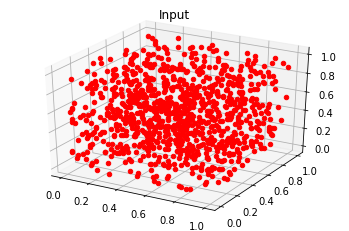

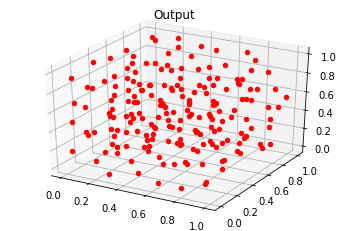

In [13]:
#Brute Force Method with O(n^2)
#Calculating dist with each point with each 
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import itertools
import random
import time
import math
start=time.time()

# Sorting the list with x-co-ordinate
updated_list_ref = sorted(lst3D)
print(len(updated_list_ref))
tol=0.000001
i=0
while i< len(updated_list_ref)-1:
  j=i+1
  while j <len(updated_list_ref):
    if distance_x(updated_list_ref[i],updated_list_ref[j])<tol and distance_y(updated_list_ref[i],updated_list_ref[j])<tol :
      if distance_z(updated_list_ref[i],updated_list_ref[j])<tol:
        dist = distance3D(updated_list_ref[i],updated_list_ref[j])
        if dist<tol:
          updated_list_ref.pop(j)
          j-=1
    j+=1
  i+=1

end=time.time()

# Number of Points in the updated list
print(len(updated_list_ref))
# Print the total time for algorithm
print(end-start)

# 3D Visualization
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.figure(1)
for p in lst3D:
    ax.scatter(p[0], p[1], p[2], zdir='z', c='r')
plt.title('Input')

fig = plt.figure()
bx = fig.gca(projection='3d')
plt.figure(2)
for p in updated_list_ref:
    bx.scatter(p[0], p[1], p[2], zdir='z', c='r')
plt.title('Output')

plt.show()

We get the same results for both Brutforce method and Algorithm but with the reduced time.

In [14]:
# Create a new file to store the updated points
Data= open("Updated_Points_3D.txt","w+")

# Writing the new Points in the file 
with open('Updated_Points.txt', 'w+') as filehandle:
    for i in range(0,len(updated_list_3D)):
        filehandle.writelines(" ".join(str(x) for x in updated_list_3D[i]))
        filehandle.writelines("\n")

# Close file      
Data.close  

<function TextIOWrapper.close()>

Text(0, 0.5, 'Time')

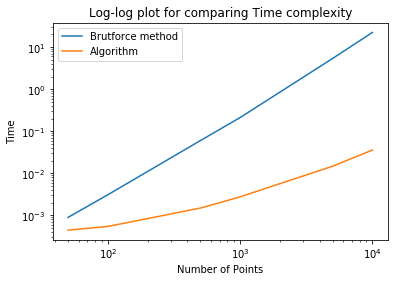

In [15]:
# Tolerence = 0.000001
import statistics
nn=[50,100,500,1000,5000,10000] # Number of Points in the Input
# Time in seconds for each case
t_algo=[0.00044536590576171875,0.0005443096160888672,0.0014872550964355469,0.0027539730072021484,0.01472330093383789,0.03570199012756348]
t_brut=[0.0008940696716308594,0.0030884742736816406,0.059842586517333984,0.21149277687072754,5.373635292053223,22.34713840484619]
plt.figure(3)
plt.loglog(nn,t_brut)
plt.loglog(nn,t_algo)
plt.title('Log-log plot for comparing Time complexity')
plt.legend(['Brutforce method','Algorithm'])
plt.xlabel('Number of Points')
plt.ylabel('Time')